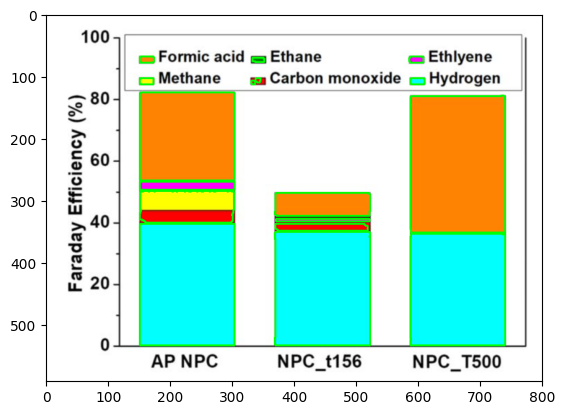

: 

In [ ]:
import cv2
import numpy as np

def find_contours(image: cv2.typing.MatLike):
    def segment_by_color(image, lower_color, upper_color):
        # 将图像转换为HSV颜色空间
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # 根据颜色范围创建掩码
        mask = cv2.inRange(hsv_image, lower_color, upper_color)

        # 对掩码进行形态学操作（可选）
        mask = cv2.erode(mask, None, iterations=2)
        mask = cv2.dilate(mask, None, iterations=2)

        return mask


    # 定义多个颜色范围（例如，红色和蓝色）
    gap = 20
    color_ranges = [
        (np.array([hue * gap, 100, 100]), np.array([(hue + 1) * gap, 255, 255])) for hue in range(int(360 / gap / 2))
    ]

    # black
    color_ranges.append((np.array([0, 0, 0]), np.array([360, 255, 30])))

    # 初始化总掩码
    total_mask = np.zeros(image.shape[:2], dtype="uint8")

    # 对每个颜色范围进行分割
    for lower_color, upper_color in color_ranges:
        mask = segment_by_color(image, lower_color, upper_color)
        total_mask = cv2.bitwise_or(total_mask, mask)

    # 在总掩码上查找轮廓
    contours, hierarchy = cv2.findContours(total_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return contours

# 在原始图像上绘制轮廓
image = cv2.imread('clipboard.png')
contours = find_contours(image)
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# 显示结果
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))